In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import sqlite3
import os.path
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns

# Part 1 

### Part 1: A-Check for missing values in each table: 
##### No relevant missing values were found 

In [ ]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

df_team = pd.read_sql("SELECT * FROM Teams", conn)
df_salary = pd.read_sql("SELECT * FROM Salaries", conn)

# A: 
# check for missing values:
# main concern is that salaries table is missing values in salary col  or 
# teams table is missing vlaues in the wins col 

if df_team.W[df_team.W.isnull()].empty:
   print('No null win value in teams table')

if df_salary.salary[df_salary.salary.isnull()].empty:
   print('No null salary value in salary table')

No null win value in teams table
No null salary value in salary table


### Part 1: B-Join the tables and justify the join  
#### The join statement is shown below. Since we are concerened mainly about analyzing the relation between the payroll and the winning percentage which are in different tables an inner join should be used. 

In [ ]:
query = "SELECT Salaries.teamID , Salaries.yearID, sum(Salaries.salary) as 'totalTeamSalary', \
((CAST(Teams.W AS FLOAT))/(CAST(Teams.G AS FLOAT))*100.0) as 'winningPercentage', Teams.franchID  \
FROM Teams, Salaries WHERE Teams.teamID=Salaries.teamID and Salaries.yearID=Teams.yearID \
GROUP BY Salaries.teamID, Salaries.yearID "
df = pd.read_sql(query, conn)
df.sample(100)

,teamID,yearID,totalTeamSalary,winningPercentage,franchID
183,BAL,1992,23780667.0,54.938272,BAL
805,CLE,2013,75771800.0,56.790123,CLE
474,CHN,2002,75690833.0,41.358025,CHC
465,TBA,2001,56980000.0,38.271605,TBD
207,TOR,1992,44788666.0,59.259259,TOR
...,...,...,...,...,...
58,CIN,1987,9281500.0,51.851852,CIN
196,MON,1992,15822334.0,53.703704,WSN
118,MON,1989,13807389.0,50.000000,WSN
574,MIN,2005,56186000.0,51.234568,MIN


### Part 2: plot payrolls for all teams from (1990-2014)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


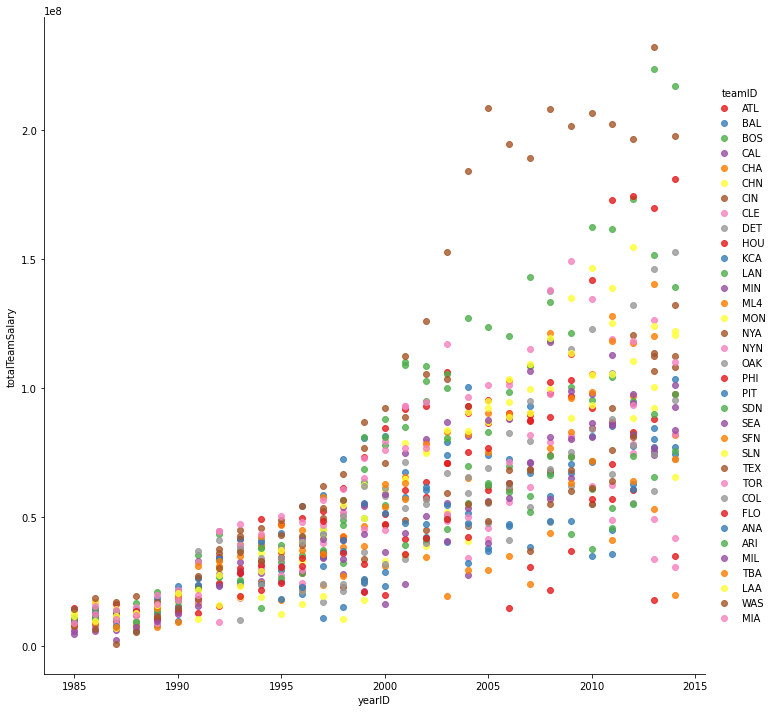

In [ ]:
sns.lmplot('yearID', 'totalTeamSalary', fit_reg=False, hue='teamID', data=df, 
           size=10, palette='Set1')

### Question 2: conclusions about the plot?
#### mean payroll goes up, also range and standard deviation. Maximum salary as well. 

###  Problem 3: Justify the conclusion in question 1 with a plot 
##### Plot showing rise in mean payroll across the teams through the years. Can also show similiar plots for standard deviation. 

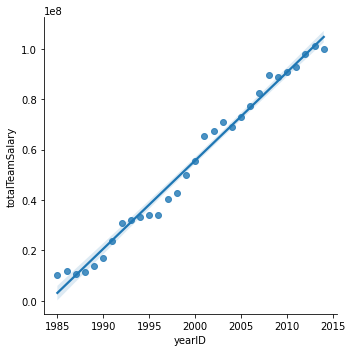

In [ ]:
means = df.groupby('yearID')['totalTeamSalary'].mean()
means= means.reset_index()
sns.lmplot(x='yearID', y='totalTeamSalary', data=means)

### Problem 4: discretize into five year periods, show mean payroll vs mean winnting percentage for each team in each time period 

In [ ]:
yearbins = range(1990,2016,5)
yearlabels = ["90-94", "95-99", "00-04", "05-09", "10-14"]
df['yearlabel'] = pd.cut(df['yearID'], bins=yearbins, labels=yearlabels, include_lowest=True)

df_grouped = df.groupby(['teamID', 'yearlabel'])['totalTeamSalary', 'winningPercentage'].mean()

df_grouped

df_grouped = df_grouped.reset_index()
df_grouped.sample(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,teamID,yearlabel,totalTeamSalary,winningPercentage
118,NYN,05-09,1.275814e+08,52.222222
91,MIL,95-99,3.793254e+07,45.475674
163,TEX,05-09,6.553780e+07,50.740741
134,PIT,10-14,6.555975e+07,51.388889
111,NYA,95-99,7.246256e+07,60.190169
...,...,...,...,...
164,TEX,10-14,1.093970e+08,53.463228
55,DET,90-94,3.089921e+07,47.856057
146,SFN,95-99,4.312716e+07,53.019011
0,ANA,90-94,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


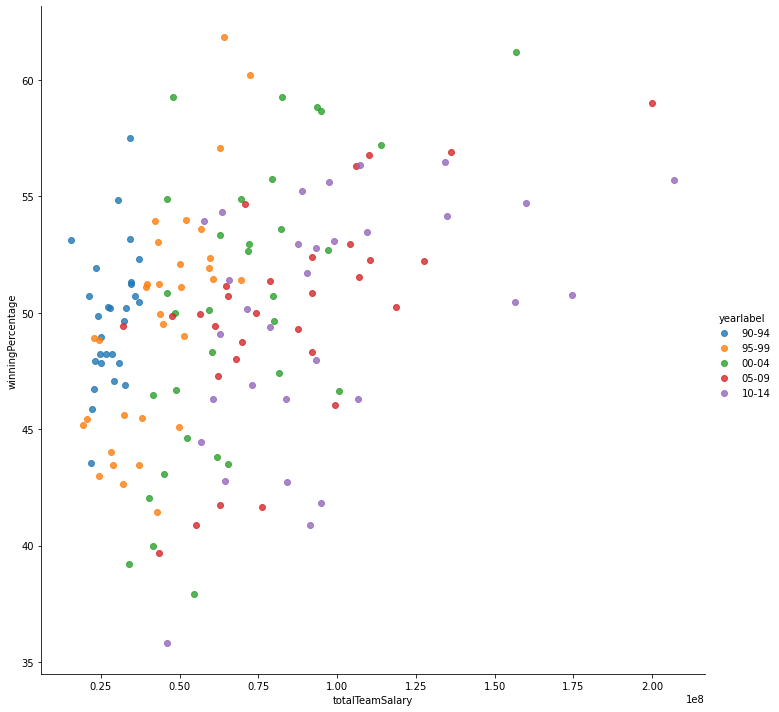

In [ ]:
sns.lmplot('totalTeamSalary', 'winningPercentage', data=df_grouped, fit_reg=False, hue='yearlabel', size=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


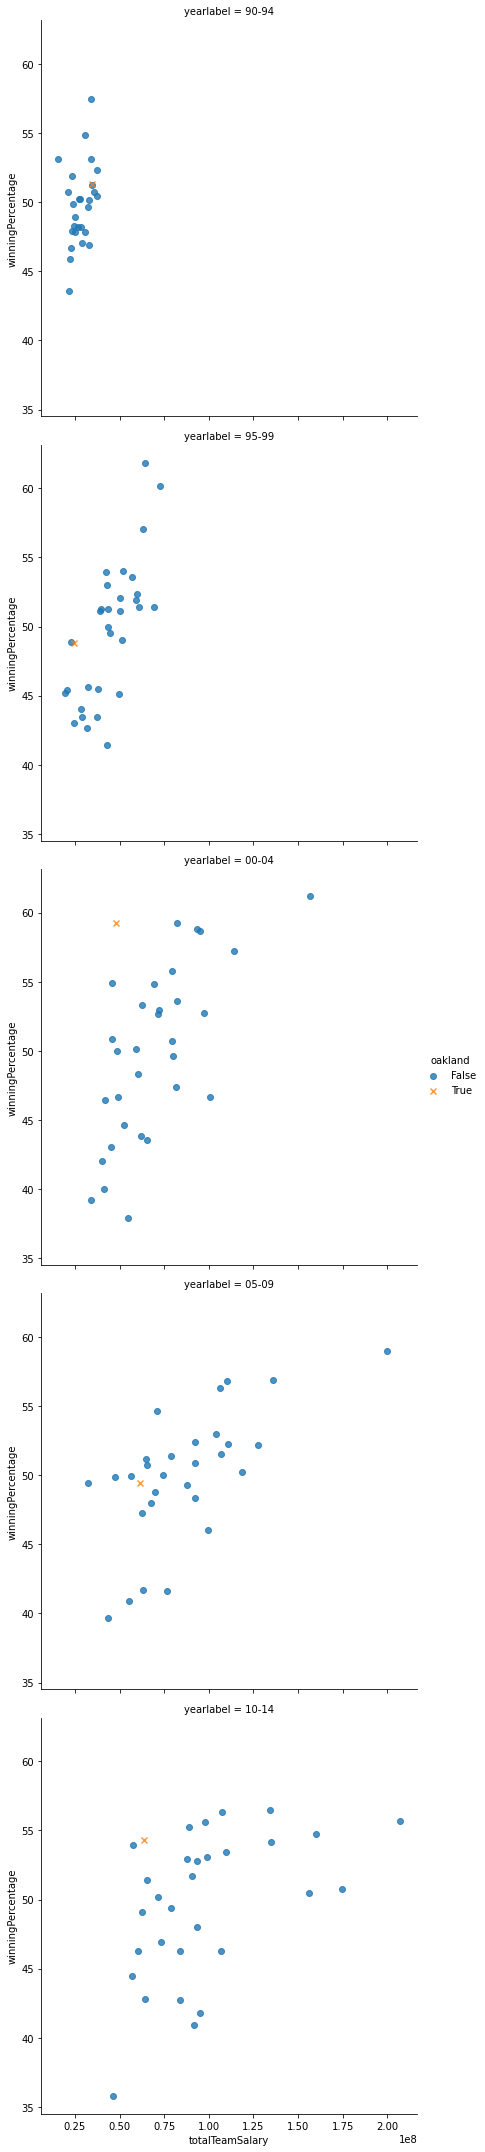

In [ ]:
df_grouped['oakland'] = df_grouped['teamID'] == 'OAK'
sns.lmplot('totalTeamSalary', 'winningPercentage', data=df_grouped, hue='oakland', row='yearlabel', markers = ['o', 'x'], fit_reg=False, size=6)

### Question 2: conclusions from previous plots?
#### The regressed line has a positive slope idicating that higher payroll leads to a higher percentage win as expetced. Oakland is a clear outlier in 2000-2005 appearing at the upper left cornet (low payrolll and high winning percentage) indciating that they had high efficieny  

### Problem 5: Calculate the standard payroll 

In [ ]:
avg_payroll = df.groupby('yearID')['totalTeamSalary'].mean()
std_payroll = df.groupby('yearID')['totalTeamSalary'].std()

df['std_payroll']= ""
for i, row in df.iterrows():
    std_pay = ( row['totalTeamSalary'] - avg_payroll[row['yearID']] )/ std_payroll[row['yearID']]
    # print(std_pay)
    # df.set_value(i, 'std_payroll', std_pay)
    # df.at(i, 'std_payroll')# = std_pay
    df['std_payroll'][i] = std_pay

df['std_payroll'] = df['std_payroll'].astype(float)
# df

1.9149052014918577
0.6010682619727185
0.332677535667475
1.7614735075714962
-0.09283754775873729
1.0633412092600383
-0.6943567609544413
-1.4261916935674515
0.11031761264161066
-0.03339514067162901
-0.30531502338955274
0.36115240467285836
-1.7446434226426095
0.48912074941200556
-0.24501703870423278
1.6847022140025383
0.3072619434193679
-0.41158350810820954
0.01999346806446195
-0.3432287669197674
0.38894289254362685
-2.210808155258408
-0.7502902476174742
0.7048266746648336
-0.9709491334412175
-0.5111672363511508
1.6511765220634276
0.36420316530740754
0.8038015833412245
0.8116520201571329
-0.44611196321241714
1.6842422393672207
0.020655950924995985
-1.264861471268259
0.1553694341348229
-0.6172919005344956
0.3775199460926967
0.9643111519690394
-0.9703274781159259
-0.5952125273785658
-0.23124206540536962
2.087789646685575
1.1149056179570251
-0.6467416286354218
-0.07856787220143449
-0.3128559834603581
-0.14429610079325533
-1.8457263331603475
-0.9079378580904452
-0.6167478077474623
-1.59946943

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


1.4883784570622294
1.0985680373915383
-0.721110787141317
0.32366502709191236
-0.45114695099646557
-0.8526868656223304
0.2383156081814688
-0.3714069959555955
-0.09335648325861658
1.5087775407121433
1.0220880386415927
-0.33669211214923755
0.5324220245722838
-0.39173319963564923
0.8113916707735539
0.7778687342192696
1.3728331623054841
-1.477825870041521
-2.3668064896514984
0.6439393494945231
-1.394473985677493
-0.21603120319456015
0.990108565240454
0.7719475763109884
-0.4318525186102645
-0.9096327832683153
-1.4411799388841038
1.1286122331851052
0.7407174136532505
0.6073476832521744
-0.3971488598221249
-0.7996263192248989
-0.7250130358245642
0.053217332971986185
0.30815054625441773
-0.9572364363074363
0.45187772676212845
1.6327306946544504
1.9049103539668217
0.6698237436108863
0.5536654452337404
-0.9357517752479478
0.7089932619380619
0.3693768755747899
0.9174642754687706
-0.31030461476420346
-1.0845291590140136
0.9742918343374872
-1.3488508003585846
-0.00129095717075253
0.8681605630785644


,teamID,yearID,totalTeamSalary,winningPercentage,franchID,yearlabel,std_payroll
0,ATL,1985,14807000.0,40.740741,ATL,NaN,1.914905
1,BAL,1985,11560712.0,51.552795,BAL,NaN,0.601068
2,BOS,1985,10897560.0,49.693252,BOS,NaN,0.332678
3,CAL,1985,14427894.0,55.555556,ANA,NaN,1.761474
4,CHA,1985,9846178.0,52.147239,CHW,NaN,-0.092838
...,...,...,...,...,...,...,...
853,SLN,2014,120693000.0,55.555556,STL,10-14,0.457126
854,TBA,2014,72689100.0,47.530864,TBD,10-14,-0.593171
855,TEX,2014,112255059.0,41.358025,TEX,10-14,0.272509
856,TOR,2014,109920100.0,51.234568,TOR,10-14,0.221422


### Problem 6: Repeate plots of part 4 with standard payroll instead  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


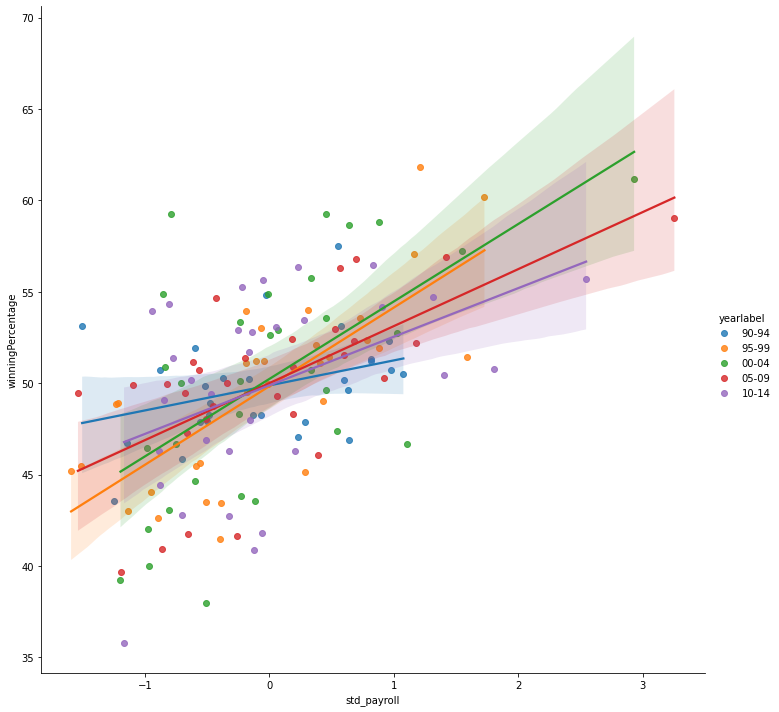

In [ ]:
df_grouped = df.groupby(['teamID', 'yearlabel'])['std_payroll', 'winningPercentage'].mean()

df_grouped = df_grouped.reset_index()
df_grouped.sample()

sns.lmplot('std_payroll', 'winningPercentage', data=df_grouped, hue='yearlabel', size=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


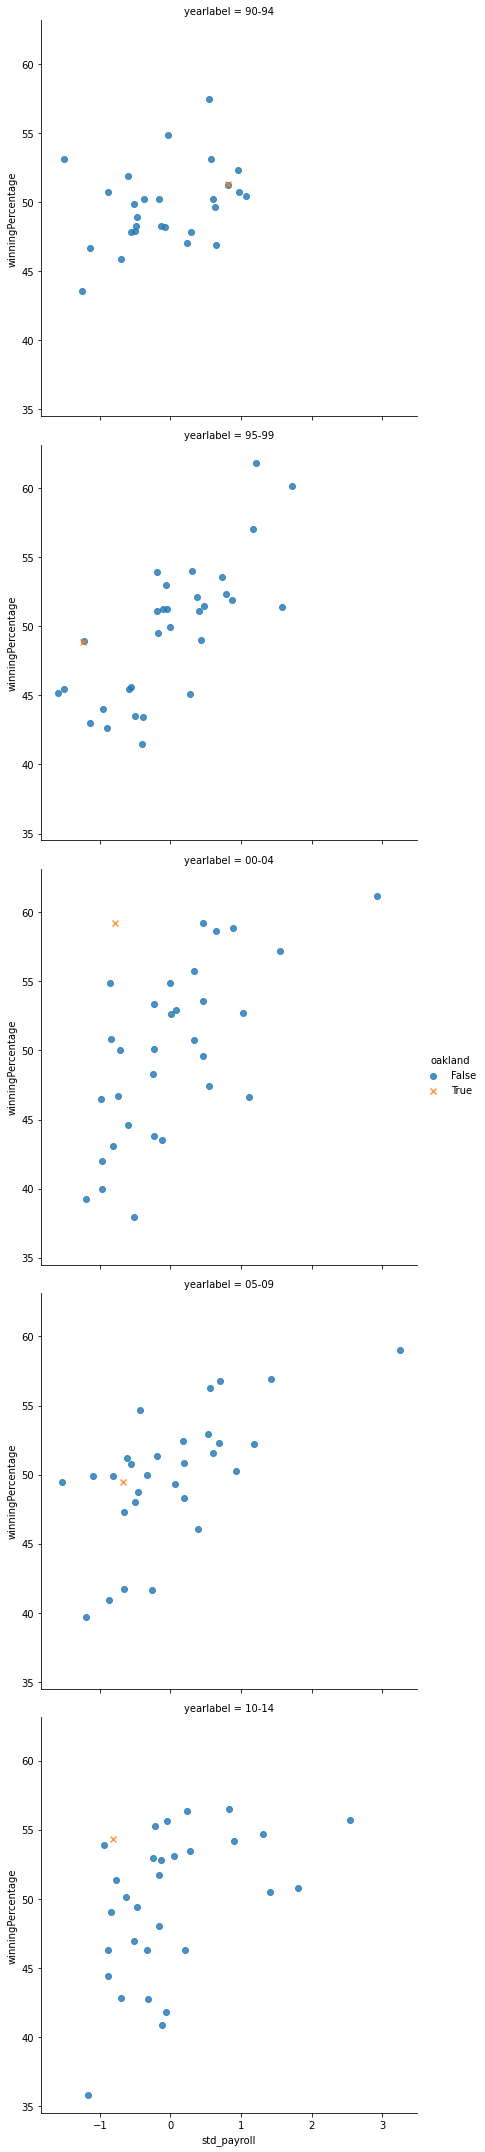

In [ ]:
df_grouped['oakland'] = df_grouped['teamID'] == 'OAK'
sns.lmplot('std_payroll', 'winningPercentage', data=df_grouped, hue='oakland', row='yearlabel', markers = ['o', 'x'], fit_reg=False, size=6)

### Question 3: what is the effect of standarizing the payroll?  
#### standard payroll indicates the payroll compared to the whole sample, e.g. zero means paying average,  a value of 3 means three  standard deviations above average, negative means below average, and so on. The trend would remain the same: positive slope, i.e. higher payroll leads overall to a higher percentage win

### Problem 7:plot standard payroll vs winning percentage 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


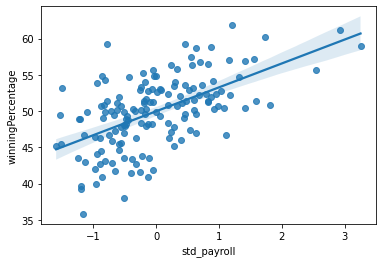

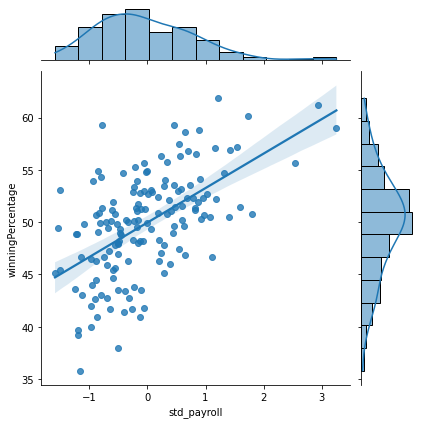

In [ ]:
sns.regplot('std_payroll', 'winningPercentage', data=df_grouped)
sns.jointplot(df_grouped['std_payroll'], df_grouped['winningPercentage'], kind='reg')

In [ ]:
import statsmodels.api as sm
sm.OLS(df['winningPercentage'], df['std_payroll']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      winningPercentage   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.079
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                       0.150
Time:                        19:18:58   Log-Likelihood:                         -4580.7
No. Observations:                 858   AIC:                                      9163.
Df Residuals:                     857   BIC:                                      9168.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
std_payroll     2.5269      1.752      1.442      0.150      -0.913       5.966
==============================================================================
Omnibus:                        2.363   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                2.311
Skew:                          -0.082   Prob(JB):                        0.315
Kurtosis:                       2.805   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 5: Calculate the efficieny and draw year vs efficiency for (OAK, BOS, NYA, ATL, TBA)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,teamID,yearID,totalTeamSalary,winningPercentage,franchID,yearlabel,std_payroll,efficiency
0,ATL,1985,14807000.0,40.740741,ATL,NaN,1.914905,-14.046522
1,BAL,1985,11560712.0,51.552795,BAL,NaN,0.601068,0.050124
2,BOS,1985,10897560.0,49.693252,BOS,NaN,0.332678,-1.138442
3,CAL,1985,14427894.0,55.555556,ANA,NaN,1.761474,1.151872
4,CHA,1985,9846178.0,52.147239,CHW,NaN,-0.092838,2.379333
...,...,...,...,...,...,...,...,...
853,SLN,2014,120693000.0,55.555556,STL,10-14,0.457126,4.412740
854,TBA,2014,72689100.0,47.530864,TBD,10-14,-0.593171,-0.986208
855,TEX,2014,112255059.0,41.358025,TEX,10-14,0.272509,-9.323248
856,TOR,2014,109920100.0,51.234568,TOR,10-14,0.221422,0.681014


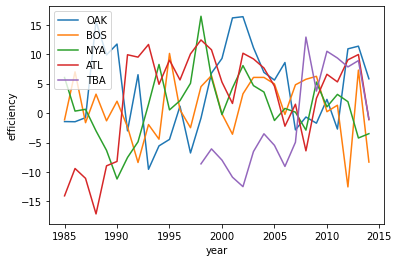

In [ ]:
df['efficiency']= ""
for i, row in df.iterrows():
    exp_win = 50 + 2.5*row['std_payroll']
    eff =  row['winningPercentage'] - exp_win 
    # df.set_value(i, 'efficiency', eff)
    df['efficiency'][i] = eff

df['efficiency'] = df['efficiency'].astype(float)

selected_teams = ['OAK','BOS','NYA','ATL','TBA']

for team in selected_teams:
    x = df['yearID'][df['teamID']==team]
    y = df['efficiency'][df['teamID']==team]
    plt.plot(x ,y, label=team)

plt.xlabel("year")
plt.ylabel("efficiency")
plt.legend(loc='upper left')

df


### Question 4: What have leared from the plot in comparison to the previous plots 
#### Previous plots associated a single measure (mean of payroll or mean of standarized payroll) for a given time period. This plot is showing performance (efficiency) as a function of time. There is a clear peak in Oakland's efficency between 2000-2005 as expected.